In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)
library(lubridate)


In [ ]:
file_path <- "D:/raw.csv"
df = 
View(df) 
#STRUCTURE OF THE DATA 
str(df)


Rows: 149116 Columns: 16
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): transaction_date, store_location, product_category, product_type, ...
dbl  (7): transaction_id, store_id, product_id, transaction_qty, unit_price,...
time (1): transaction_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,Size,Total_bill,Month Name,Day Name,Hour
<dbl>,<chr>,<time>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
114301,01-06-2023,11:33:29,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Thursday,11
115405,02-06-2023,11:18:24,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Friday,11
115478,02-06-2023,12:02:45,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Friday,12
116288,02-06-2023,19:39:47,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Friday,19
116714,03-06-2023,12:24:57,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Saturday,12
116739,03-06-2023,12:44:17,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Saturday,12
116853,03-06-2023,13:58:14,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Saturday,13
117389,03-06-2023,18:57:29,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Saturday,18
118056,04-06-2023,14:31:43,3,Airport,45,1,3,Tea,Brewed herbal tea,Peppermint,Large,3,June,Sunday,14


spc_tbl_ [149,116 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ transaction_id  : num [1:149116] 114301 115405 115478 116288 116714 ...
 $ transaction_date: chr [1:149116] "01-06-2023" "02-06-2023" "02-06-2023" "02-06-2023" ...
 $ transaction_time: 'hms' num [1:149116] 11:33:29 11:18:24 12:02:45 19:39:47 ...
  ..- attr(*, "units")= chr "secs"
 $ store_id        : num [1:149116] 3 3 3 3 3 3 3 3 3 3 ...
 $ store_location  : chr [1:149116] "Airport" "Airport" "Airport" "Airport" ...
 $ product_id      : num [1:149116] 45 45 45 45 45 45 45 45 45 45 ...
 $ transaction_qty : num [1:149116] 1 1 1 1 1 1 1 1 1 1 ...
 $ unit_price      : num [1:149116] 3 3 3 3 3 3 3 3 3 3 ...
 $ product_category: chr [1:149116] "Tea" "Tea" "Tea" "Tea" ...
 $ product_type    : chr [1:149116] "Brewed herbal tea" "Brewed herbal tea" "Brewed herbal tea" "Brewed herbal tea" ...
 $ product_detail  : chr [1:149116] "Peppermint" "Peppermint" "Peppermint" "Peppermint" ...
 $ Size            : chr [1:149116] "Large" "L

In [11]:
# Convert necessary columns to appropriate data types
df$transaction_date <- as.Date(df$transaction_date)
df$transaction_time <- hms::as_hms(df$transaction_time)


In [12]:
# 1. Time-based Analysis

# Transactions by Hour
hourly_sales <- df %>%
  group_by(Hour) %>%
  summarize(total_transactions = n(),
            total_sales = sum(Total_bill))


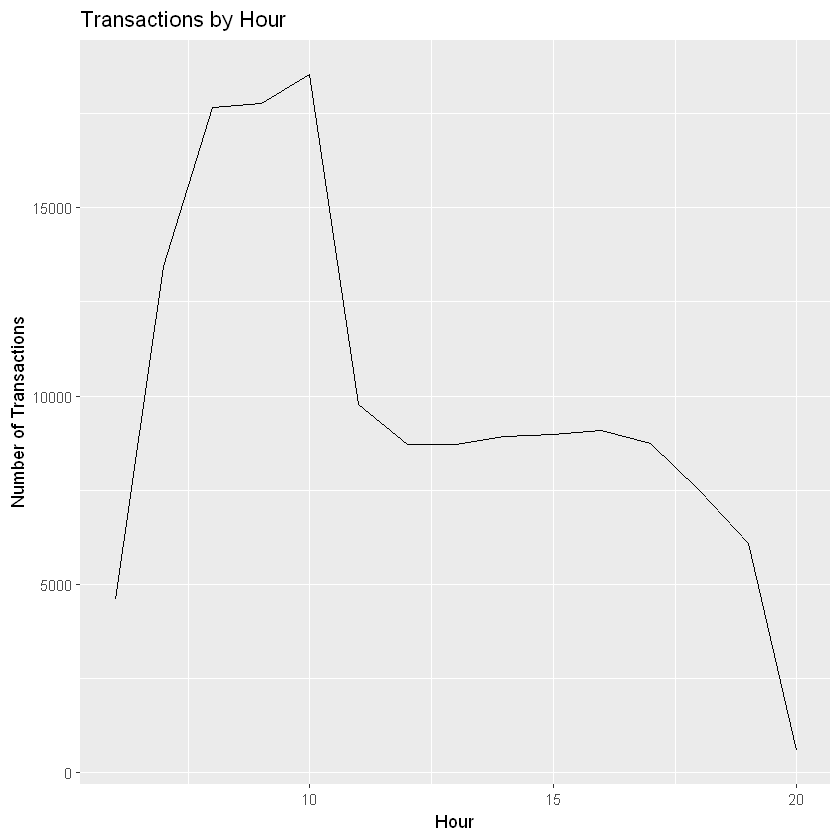

In [13]:
# Plot transactions by hour
ggplot(hourly_sales, aes(x = Hour, y = total_transactions)) +
  geom_line() +
  labs(title = "Transactions by Hour", x = "Hour", y = "Number of Transactions")


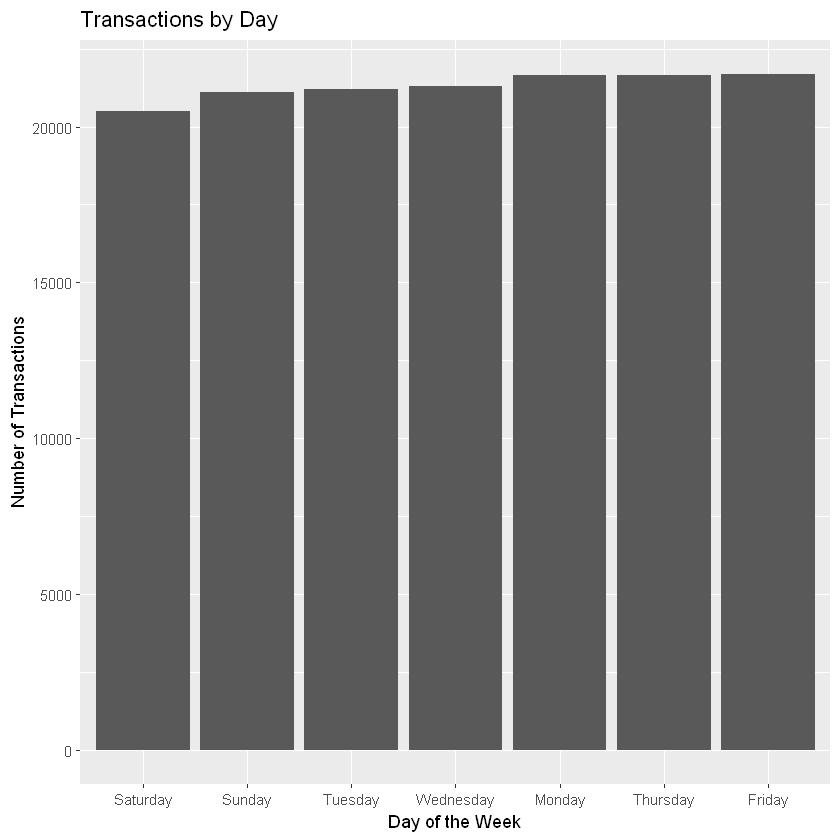

In [14]:
# Transactions by Day
daily_sales <- df %>%
  group_by(`Day Name`) %>%
  summarize(total_transactions = n(),
            total_sales = sum(Total_bill))

# Plot transactions by day
ggplot(daily_sales, aes(x = reorder(`Day Name`, total_transactions), y = total_transactions)) +
  geom_bar(stat = "identity") +
  labs(title = "Transactions by Day", x = "Day of the Week", y = "Number of Transactions")


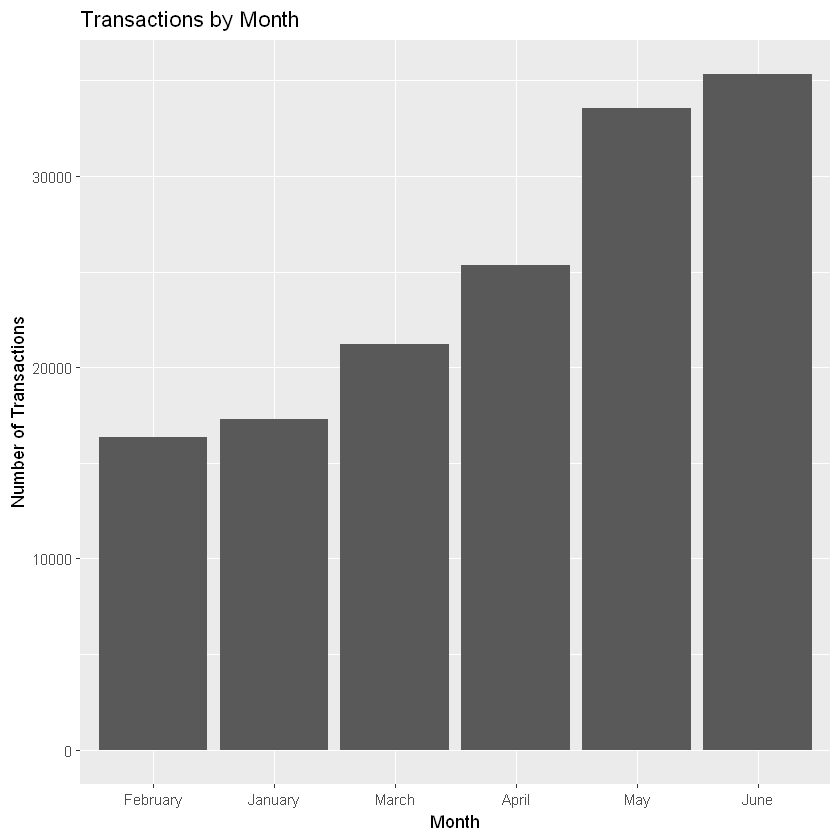

In [15]:
# Transactions by Month
monthly_sales <- df %>%
  group_by(`Month Name`) %>%
  summarize(total_transactions = n(),
            total_sales = sum(Total_bill))

# Plot transactions by month
ggplot(monthly_sales, aes(x = reorder(`Month Name`, total_transactions), y = total_transactions)) +
  geom_bar(stat = "identity") +
  labs(title = "Transactions by Month", x = "Month", y = "Number of Transactions")


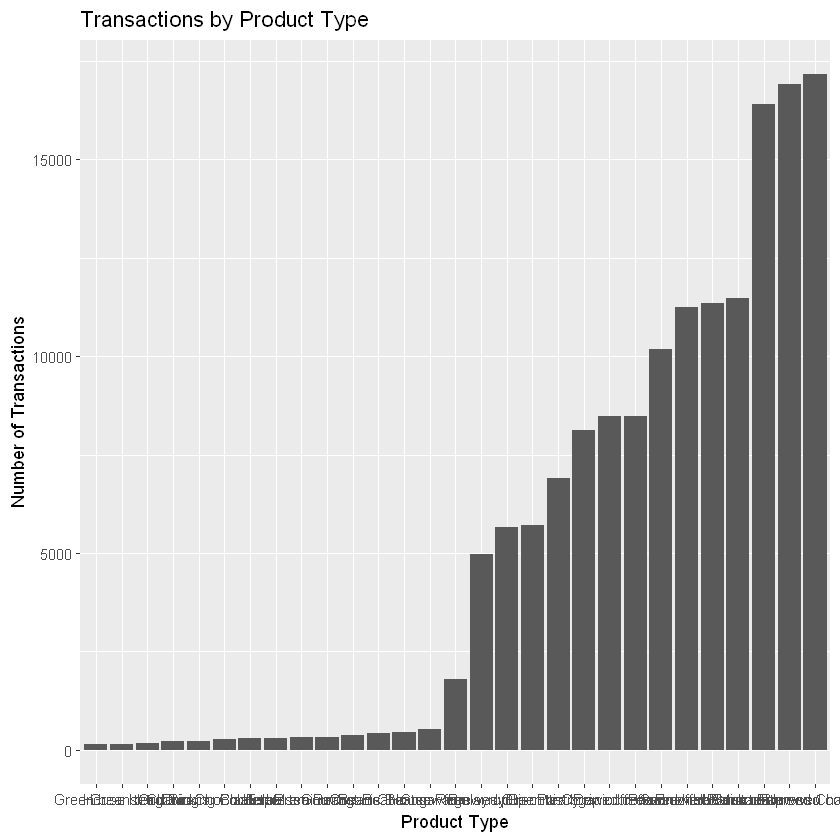

In [17]:
# Transactions by Product Type
type_sales <- df %>%
  group_by(product_type) %>%
  summarize(total_transactions = n(),
            total_sales = sum(Total_bill))

# Plot transactions by product type
ggplot(type_sales, aes(x = reorder(product_type, total_transactions), y = total_transactions)) +
  geom_bar(stat = "identity") +
  labs(title = "Transactions by Product Type", x = "Product Type", y = "Number of Transactions")


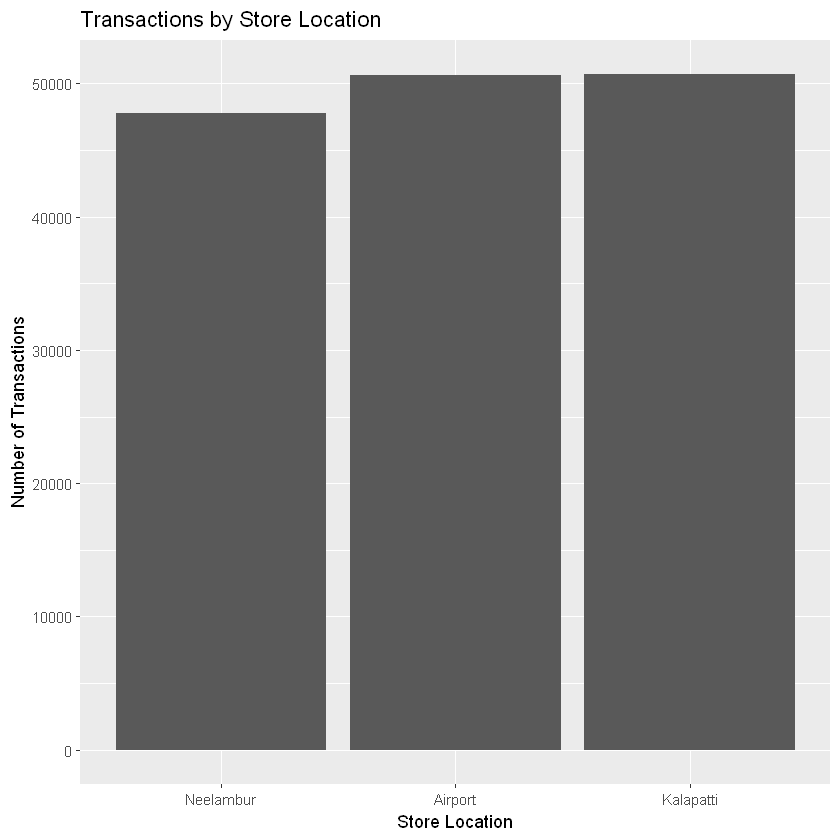

In [18]:
# 3. Location-based Analysis

# Transactions by Store Location
location_sales <- df %>%
  group_by(store_location) %>%
  summarize(total_transactions = n(),
            total_sales = sum(Total_bill))

# Plot transactions by store location
ggplot(location_sales, aes(x = reorder(store_location, total_transactions), y = total_transactions)) +
  geom_bar(stat = "identity") +
  labs(title = "Transactions by Store Location", x = "Store Location", y = "Number of Transactions")


[1] 0.3562309

`geom_smooth()` using formula = 'y ~ x'


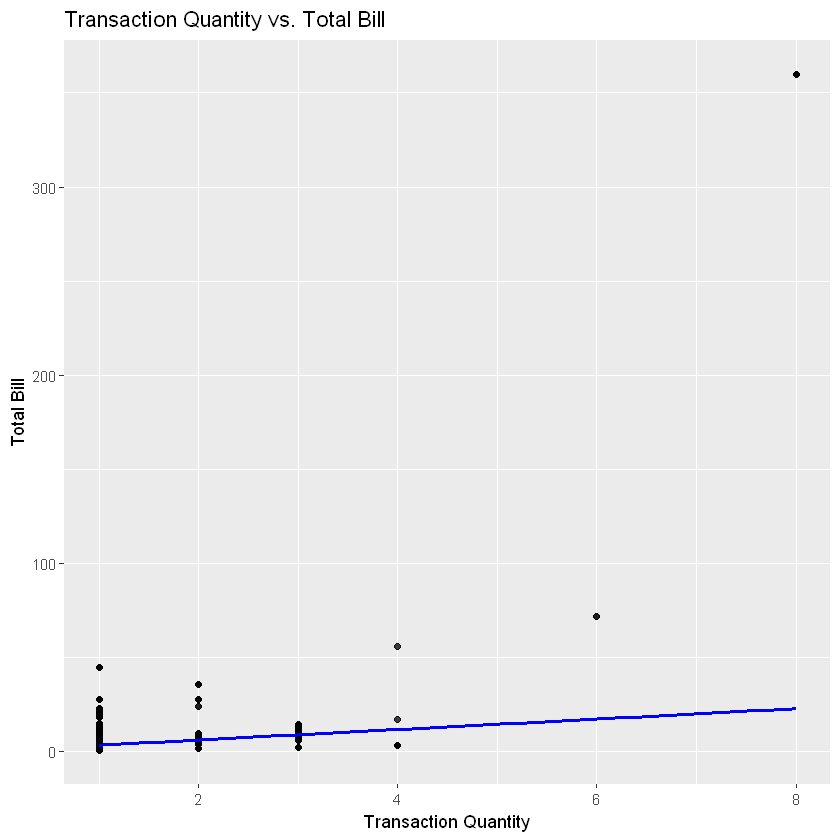

In [19]:
# 4. Correlation Analysis

# Transaction Quantity vs. Total Bill
correlation <- cor(df$transaction_qty, df$Total_bill)
correlation

# Plot the relationship between transaction quantity and total bill
ggplot(df, aes(x = transaction_qty, y = Total_bill)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Transaction Quantity vs. Total Bill", x = "Transaction Quantity", y = "Total Bill")
